### 缩减系数来“理解”数据
* 如果特征比样本点还多（n > m），也就是说输入数据的矩阵X不是满秩矩阵。使用线性回归和之前的方法来做预测是会出错，因为非满秩矩阵在求逆时会出现问题。
* 缩减方法：岭回归（ridge regression）；lasso法

### 岭回归
* 岭回归就是在矩阵$X^TX$上加一个 $\lambdaI$从而使得矩阵非奇异，进而能对 $X^TX+\lambdaI$求逆。其中矩阵I是一个 $mxm$的单位矩阵，对角线上元素全为1，其他元素全为0。
* 岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入λ来限制了所有w之和，通过引入该惩罚项，能够减少不重要的参数，这个技术在统计学中也叫做缩减（shrinkage）。

* 通过预测误差最小化得到λ：数据获取之后，首先抽一部分数据用于测试，剩余的作为训练集用于训练参数w。训练完毕后在测试集上测试预测性能。通过选取不同的λ来重复上述测试过程，最终得到一个使预测误差最小的λ。

In [9]:
from numpy import *

In [2]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

* 做标准化时：y值也要做处理？结果与标准化前是一致的么？

In [4]:
def ridgeTest(xArr,yArr):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean        # y值也要做处理？
    # 标准化处理：所有特征都减去各自的均值并除以方差（第二章用过）
    xMeans = mean(xMat,0)   
    xVar = var(xMat,0)      
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):                # 30个不同的lambda
        ws = ridgeRegres(xMat,yMat,exp(i-10))  # lambda应以指数级变化，这样可以看出lambda在取非常小的值时和取非常大的值时分别对结果造成的影响。
        wMat[i,:]=ws.T                         # 最后将所有的回归系数输出到一个矩阵并返回
    return wMat

In [6]:
# 通用函数：用于分析制表符分隔的浮点数
def loadDataSet(fileName):      
    numFeat = len(open(fileName).readline().split('\t')) - 1  
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [7]:
abX,abY = loadDataSet('abalone.txt')

In [10]:
ridgeWeights = ridgeTest(abX,abY)

In [11]:
ridgeWeights

array([[ 4.30441949e-02, -2.27416346e-02,  1.32140875e-01,
         2.07518171e-02,  2.22403745e+00, -9.98952980e-01,
        -1.17254237e-01,  1.66229222e-01],
       [ 4.30441928e-02, -2.27416370e-02,  1.32140878e-01,
         2.07518175e-02,  2.22403626e+00, -9.98952746e-01,
        -1.17254174e-01,  1.66229339e-01],
       [ 4.30441874e-02, -2.27416435e-02,  1.32140885e-01,
         2.07518187e-02,  2.22403305e+00, -9.98952110e-01,
        -1.17254003e-01,  1.66229656e-01],
       [ 4.30441725e-02, -2.27416613e-02,  1.32140904e-01,
         2.07518218e-02,  2.22402431e+00, -9.98950381e-01,
        -1.17253537e-01,  1.66230518e-01],
       [ 4.30441321e-02, -2.27417096e-02,  1.32140956e-01,
         2.07518304e-02,  2.22400054e+00, -9.98945682e-01,
        -1.17252271e-01,  1.66232862e-01],
       [ 4.30440221e-02, -2.27418409e-02,  1.32141096e-01,
         2.07518537e-02,  2.22393595e+00, -9.98932910e-01,
        -1.17248829e-01,  1.66239232e-01],
       [ 4.30437233e-02, -2.274219

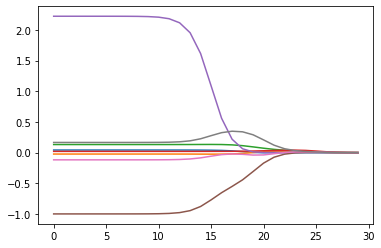

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)   # 回归系数与log(λ)的关系
ax.plot(ridgeWeights)       # [[1,2,3],[2,3,4]] lambda=0时为[1,2,3];lambda=1时为[2,3,4]
plt.show()

* 在最左边，即λ最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减成0；在中间部分的某值将可以取得最好的预测效果。为了定量地找到最佳参数值，还需要进行交叉验证。另外，要判断哪些变量对结果预测最具有影响力，在图中观察它们对应的系数大小就可以。 
* 也不是完全缩减成0。相当于2范数，权重缩减

### lasso
* lasso:使用绝对值取代了平方和。
* 在λ足够小的时候，一些系数会因此被迫缩减到0，这个特性可以帮助我们更好地理解数据。这两个约束条件在公式上看起来相差无几，但细微的变化却极大地增加了计算复杂度(带绝对值).（为了在这个新的约束条件下解出回归系数，需要使用二次规划算法）。因此使用前向逐步回归

#### 前向逐步回归
* 前向逐步回归算法可以得到与lasso差不多的效果，但更加简单。它属于一种贪心算法，即每一步都尽可能减少误差。一开始，所有的权重都设为1，然后每一步所做的决策是对某个权重增加或减少一个很小的值。

In [27]:
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   
    inVar = var(inMat,0)      
    inMat = (inMat - inMeans)/inVar
    return inMat

In [28]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [34]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     #can also regularize ys but will get smaller coef
    xMat = regularize(xMat)
    m,n=shape(xMat)
    returnMat = zeros((numIt,n)) 
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        #print (ws.T)
        lowestError = inf; 
        for j in range(n):            # 对每个特征
            for sign in [-1,1]:       # 增大或缩小
                wsTest = ws.copy()
                wsTest[j] += eps*sign # 改变一个系数得到一个新的w
                yTest = xMat*wsTest   
                rssE = rssError(yMat.A,yTest.A)  # 计算新w下的误差
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [35]:
xArr,yArr = loadDataSet('abalone.txt')

In [36]:
stageWise(xArr,yArr,0.01,200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

* 结果中w1和w6都是0，这表明它们不对目标值造成任何影响，也就是说这些特征很可能是不需要的。
* 另外，在参数eps设置为0.01的情况下，一段时间后系数就已经饱和并在特定值之间来回震荡，这是因为步长太大的缘故。这里会看到，第一个权重在0.04和0.05之间来回震荡。

In [37]:
# 更小的步长和更多的步数： 
stageWise(xArr,yArr,0.001,5000)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

* 与最小二乘法对比：可以看到在5000次迭代以后，逐步线性回归算法与常规的最小二乘法效果类似。

#### 交叉验证测试岭回归

In [1]:
def crossValidation(xArr,yArr,numVal=10):
    m = len(yArr)                           
    indexList = range(m)
    errorMat = zeros((numVal,30))#create error mat 30columns numVal rows
    for i in range(numVal):
        trainX=[]; trainY=[]
        testX = []; testY = []
        random.shuffle(indexList)
        for j in range(m):#create training set based on first 90% of values in indexList
            if j < m*0.9: 
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)    #get 30 weight vectors from ridge
        for k in range(30):#loop over all of the ridge estimates
            matTestX = mat(testX); matTrainX=mat(trainX)
            meanTrain = mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTestX-meanTrain)/varTrain #regularize test with training params
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)#test ridge results and store
            errorMat[i,k]=rssError(yEst.T.A,array(testY))
            #print errorMat[i,k]
    # 按列取平均值
    meanErrors = mean(errorMat,0)#calc avg performance of the different ridge weight vectors
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors==minMean)]
    #can unregularize to get model
    #when we regularized we wrote Xreg = (x-meanX)/var(x)
    #we can now write in terms of x not Xreg:  x*w/var(x) - meanX/var(x) +meanY
    xMat = mat(xArr); yMat=mat(yArr).T
    meanX = mean(xMat,0); varX = var(xMat,0)
    unReg = bestWeights/varX
    print ("the best model from Ridge Regression is:\n",unReg)
    print ("with constant term: ",-1*sum(multiply(meanX,unReg)) + mean(yMat)) # 数据还原

### 总结
* 岭回归是缩减法的一种，相当于对回归系数的大小施加了限制。另一种很好的缩减法是lasso。Lasso难以求解，但可以使用计算简便的逐步线性回归方法来求得近似结果。
* 缩减法还可以看做是对一个模型增加偏差的同时减少方差。偏差方差折中是一个重要的概念，可以帮助我们理解现有模型并做出改进，从而得到更好的模型。